In [139]:
import sklearn.datasets as dts
import numpy as np
import pandas as pd



In [140]:
data=dts.load_diabetes()

In [141]:
X=pd.DataFrame(data.data,columns=data.feature_names)

In [142]:
Y=pd.DataFrame(data.target,columns=["MEDV"]) #### a expliquer
Y=Y["MEDV"]


In [143]:
Y=(Y-np.mean(Y))/np.std(Y)

In [144]:
Y=Y.to_numpy() 

In [145]:
X=X.to_numpy() 

In [146]:
from sklearn.model_selection import train_test_split as tts

In [147]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=20,random_state=40) ######### random_state ==== le choix sera aleatoire 

In [148]:
from sklearn.linear_model import LinearRegression as LR

regL=LR()
regL.fit(Xtrain,Ytrain)

LinearRegression()

In [149]:
print(regL.coef_)

[  0.14852011  -3.3305229    6.6820164    4.70734841 -11.58192945
   6.8065852    1.52528418   2.53021013  10.01798256   0.5723796 ]


In [150]:
regL.intercept_

-0.003038205294102297

In [151]:
from sklearn.metrics import mean_squared_error as mse 
###erreur quadratique moyenne

erreur_RL=mse(Ytest,regL.predict(Xtest))
erreur_RL

1.1375869171535957

In [152]:
import numpy as np
  
import pandas as pd
  
from sklearn.model_selection import train_test_split
  
import matplotlib.pyplot as plt
  
# Lasso Regression
  
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [153]:

lmds=np.logspace(-4,4,50) ####pour les valeur de lambda ou bien alpha generer de 1à ala puissance -4 jusqu'a 10 a la puissance 4
erreurs=[]
ws=[]

#reg=Ridge()
reg=LassoRegression( iterations = 1000, learning_rate = 0.001, l1_penality = 500 )
emin =1000
w_optx=[]

for lm in lmds:

  reg.l1_penality=lm
  reg.fit(Xtrain,Ytrain)
  e=mse(Ytest,reg.predict(Xtest))
  erreurs.append(e)
  ws.append(reg.W)
  if(e<emin):
    emin=e
    w_optx=reg.W



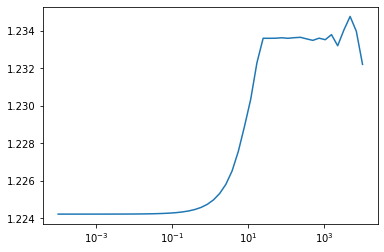

In [154]:
import matplotlib.pyplot as ppt

f=ppt.gca()
f.plot(lmds,erreurs)
f.set_xscale('log')

In [155]:
reg.W

array([ 0.01909819,  0.00392983,  0.00903047, -0.00250868,  0.0186696 ,
        0.01518391,  0.00850099, -0.00670778,  0.00692278, -0.01138233])

In [156]:
emin

1.2242201269237003